CODE BLOCK: 1

In [ ]:
import sys
#Check the working mode
'google.colab' in sys.modules

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys

# Add the directory containing your module to the Python path
module_path = '/content/drive/MyDrive/Colab_Notebooks/Session6'
sys.path.append(module_path)

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
#os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [ ]:
# if 'google.colab' in sys.modules:
#     # Download the repo from GitHub
#     print("Downloading repository on Colab...")
#     !git clone https://github.com/Shivdutta/ERA2-Session6.git

#     # Import files from the downloaded repository
#     #sys.path.insert(0,'./ERA/Session/')

CODE BLOCK: 2

In [ ]:
# Check if GPU is available
# Set device as GPU if available else CPU
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

CUDA Available? False


In [ ]:
# %run /content/drive/MyDrive/Colab_Notebooks/Session6/utils.py
# %run /content/drive/MyDrive/Colab_Notebooks/Session6/dataset.py
# %run /content/drive/MyDrive/Colab_Notebooks/Session6/model.py

CODE BLOCK: 3

In [ ]:
from model import Net
#dropout_prob=0.069

In [ ]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1325,), (0.3104,))
    ])

CODE BLOCK: 4 & 5 merged

In [ ]:
from dataset import get_train_loader, get_test_loader
dir(get_train_loader)
#torch.manual_seed(1)

kwargs = {'batch_size': 256, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}
print(kwargs)

train_loader = get_train_loader(**kwargs)
test_loader = get_test_loader(**kwargs)

{'batch_size': 256, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}


100%|██████████| 9912422/9912422 [00:00<00:00, 210915742.92it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 31132278.03it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 76223288.33it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 13111169.15it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



CODE BLOCK: 6

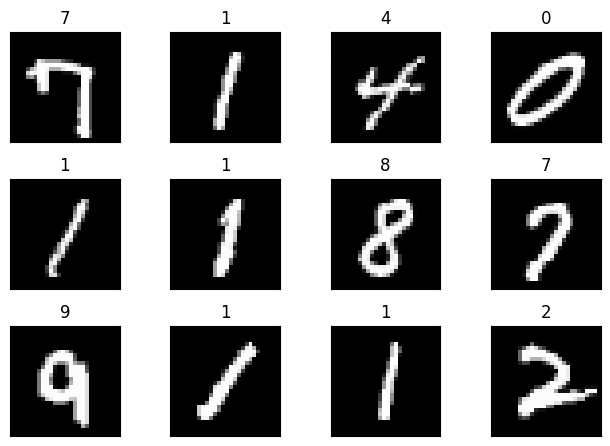

In [ ]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

In [ ]:
from utils import plot_accuracy, get_summary
dropout_prob = 0.01
get_summary(Net(dropout_prob), (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 28, 28]              36
              ReLU-2            [-1, 4, 28, 28]               0
       BatchNorm2d-3            [-1, 4, 28, 28]               8
         Dropout2d-4            [-1, 4, 28, 28]               0
            Conv2d-5            [-1, 8, 26, 26]             288
              ReLU-6            [-1, 8, 26, 26]               0
       BatchNorm2d-7            [-1, 8, 26, 26]              16
         Dropout2d-8            [-1, 8, 26, 26]               0
         MaxPool2d-9            [-1, 8, 13, 13]               0
           Conv2d-10            [-1, 4, 13, 13]              32
             ReLU-11            [-1, 4, 13, 13]               0
      BatchNorm2d-12            [-1, 4, 13, 13]               8
        Dropout2d-13            [-1, 4, 13, 13]               0
           Conv2d-14           [-1, 16,

CODE BLOCK: 8

In [ ]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [ ]:
from utils import train_model, test_model

CODE BLOCK: 10

In [ ]:
from torch.optim.lr_scheduler import StepLR

# model =  Net(dropout_prob=0.069).to(device)
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
model = Net(drop=0.01).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)

for epoch in range(1, 20):
    print('Currently Executing Epoch:', epoch)
    train_losses, train_acc = train_model(model, device, train_loader, optimizer, epoch,train_losses, train_acc)
    test_losses, test_acc = test_model(model, device, test_loader,test_losses, test_acc)
    scheduler.step()

Currently Executing Epoch: 1


Loss=0.08764149993658066 Batch_id=234 Accuracy=87.97: 100%|██████████| 235/235 [00:49<00:00,  4.74it/s]



Test set: Average loss: 0.0777, Accuracy: 9795/10000 (97.95%)

Currently Executing Epoch: 2


Loss=0.05293239653110504 Batch_id=234 Accuracy=97.53: 100%|██████████| 235/235 [00:50<00:00,  4.70it/s]



Test set: Average loss: 0.0444, Accuracy: 9871/10000 (98.71%)

Currently Executing Epoch: 3


Loss=0.07386963814496994 Batch_id=234 Accuracy=98.13: 100%|██████████| 235/235 [00:51<00:00,  4.60it/s]



Test set: Average loss: 0.0466, Accuracy: 9855/10000 (98.55%)

Currently Executing Epoch: 4


Loss=0.06884077936410904 Batch_id=234 Accuracy=98.43: 100%|██████████| 235/235 [00:48<00:00,  4.82it/s]



Test set: Average loss: 0.0312, Accuracy: 9911/10000 (99.11%)

Currently Executing Epoch: 5


Loss=0.04779453203082085 Batch_id=234 Accuracy=98.69: 100%|██████████| 235/235 [00:48<00:00,  4.84it/s]



Test set: Average loss: 0.0289, Accuracy: 9910/10000 (99.10%)

Currently Executing Epoch: 6


Loss=0.036455247551202774 Batch_id=234 Accuracy=98.84: 100%|██████████| 235/235 [00:48<00:00,  4.90it/s]



Test set: Average loss: 0.0266, Accuracy: 9913/10000 (99.13%)

Currently Executing Epoch: 7


Loss=0.14171747863292694 Batch_id=234 Accuracy=98.88: 100%|██████████| 235/235 [00:47<00:00,  4.92it/s]



Test set: Average loss: 0.0273, Accuracy: 9915/10000 (99.15%)

Currently Executing Epoch: 8


Loss=0.032472480088472366 Batch_id=234 Accuracy=98.97: 100%|██████████| 235/235 [00:48<00:00,  4.87it/s]



Test set: Average loss: 0.0230, Accuracy: 9933/10000 (99.33%)

Currently Executing Epoch: 9


Loss=0.023875338956713676 Batch_id=234 Accuracy=99.00: 100%|██████████| 235/235 [00:48<00:00,  4.83it/s]



Test set: Average loss: 0.0240, Accuracy: 9925/10000 (99.25%)

Currently Executing Epoch: 10


Loss=0.0774223804473877 Batch_id=234 Accuracy=99.03: 100%|██████████| 235/235 [00:50<00:00,  4.70it/s]



Test set: Average loss: 0.0246, Accuracy: 9921/10000 (99.21%)

Currently Executing Epoch: 11


Loss=0.019984567537903786 Batch_id=234 Accuracy=99.08: 100%|██████████| 235/235 [00:47<00:00,  4.91it/s]



Test set: Average loss: 0.0217, Accuracy: 9936/10000 (99.36%)

Currently Executing Epoch: 12


Loss=0.020529191941022873 Batch_id=234 Accuracy=99.14: 100%|██████████| 235/235 [00:49<00:00,  4.75it/s]



Test set: Average loss: 0.0224, Accuracy: 9927/10000 (99.27%)

Currently Executing Epoch: 13


Loss=0.022164056077599525 Batch_id=234 Accuracy=99.13: 100%|██████████| 235/235 [00:48<00:00,  4.87it/s]



Test set: Average loss: 0.0203, Accuracy: 9940/10000 (99.40%)

Currently Executing Epoch: 14


Loss=0.012726124376058578 Batch_id=234 Accuracy=99.18: 100%|██████████| 235/235 [00:48<00:00,  4.87it/s]



Test set: Average loss: 0.0219, Accuracy: 9928/10000 (99.28%)

Currently Executing Epoch: 15


Loss=0.06694307923316956 Batch_id=234 Accuracy=99.23: 100%|██████████| 235/235 [00:48<00:00,  4.88it/s]



Test set: Average loss: 0.0184, Accuracy: 9941/10000 (99.41%)

Currently Executing Epoch: 16


Loss=0.010196934454143047 Batch_id=234 Accuracy=99.34: 100%|██████████| 235/235 [00:47<00:00,  4.91it/s]



Test set: Average loss: 0.0170, Accuracy: 9942/10000 (99.42%)

Currently Executing Epoch: 17


Loss=0.017507145181298256 Batch_id=234 Accuracy=99.44: 100%|██████████| 235/235 [00:49<00:00,  4.76it/s]



Test set: Average loss: 0.0167, Accuracy: 9944/10000 (99.44%)

Currently Executing Epoch: 18


Loss=0.00333792925812304 Batch_id=234 Accuracy=99.45: 100%|██████████| 235/235 [00:48<00:00,  4.89it/s]



Test set: Average loss: 0.0171, Accuracy: 9944/10000 (99.44%)

Currently Executing Epoch: 19


Loss=0.0024375689681619406 Batch_id=234 Accuracy=99.50: 100%|██████████| 235/235 [00:49<00:00,  4.72it/s]



Test set: Average loss: 0.0167, Accuracy: 9941/10000 (99.41%)



In [ ]:
from utils import plot_loss,plot_accuracy


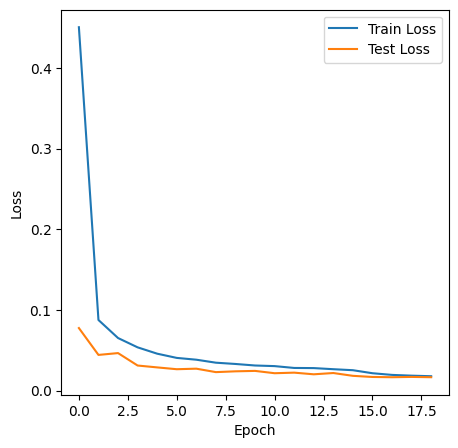

In [ ]:
plot_loss(train_losses, test_losses)

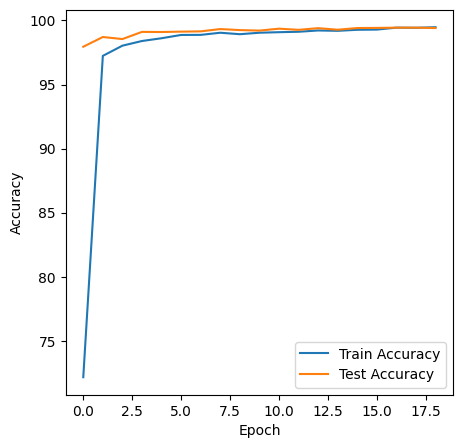

In [ ]:
plot_accuracy(train_acc, test_acc)

CODE BLOCK: 11

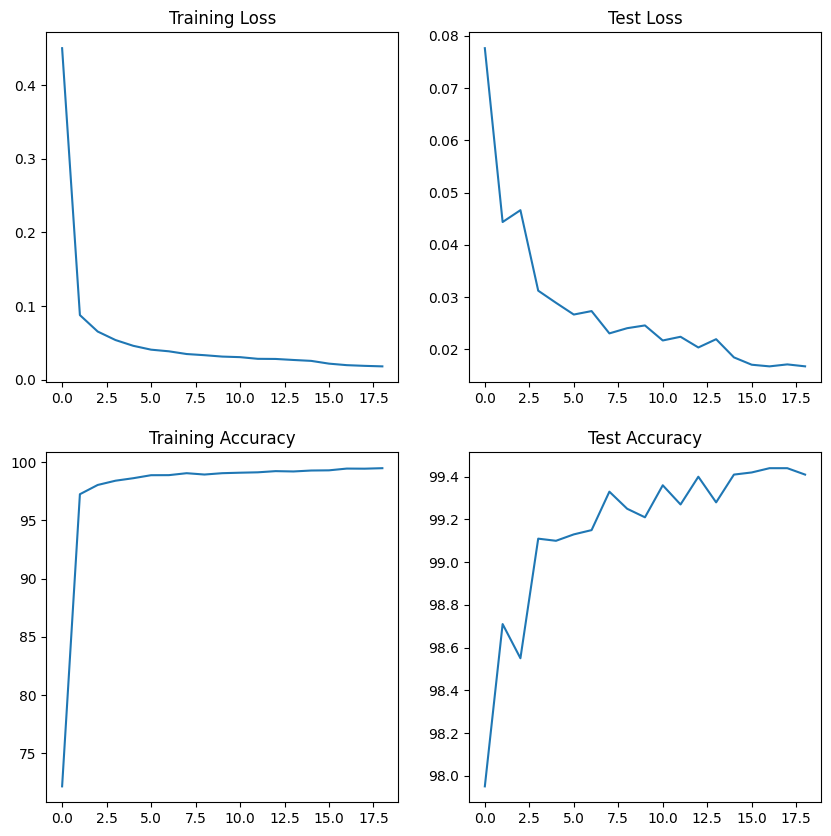

In [ ]:
# Print loss and accuracy
from utils import display_loss_and_accuracies
display_loss_and_accuracies(train_losses, train_acc, test_losses, test_acc)